<a href="https://colab.research.google.com/github/abubaker909/TWITTER-SENTIMENT-ANALYSIS-NLP-Machine-Learning/blob/main/Sentiment_twitter_analysis_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Installing kaggle library**

In [1]:
#installing kaggle library to import dataset
!pip install kaggle

**Upload your kaggle.json file**

In [2]:
#configuring the path of kaggle.json file.
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

**Importing twitter sentiment dataset**

In [3]:
#API to fetch dataset from kaggle
!kaggle datasets download -d kazanova/sentiment140

Dataset URL: https://www.kaggle.com/datasets/kazanova/sentiment140
License(s): other
 99% 80.0M/80.9M [00:03<00:00, 33.5MB/s]
100% 80.9M/80.9M [00:03<00:00, 25.5MB/s]


**Unzipping the zip file**

In [4]:
#extracting the dataset from zip file

from zipfile import ZipFile
file_name = "/content/sentiment140.zip"

with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('done')

done


**Importing the dependencies**

In [5]:
import numpy as np
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

**Downloading stopwords**

In [6]:
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

**Printing stopwords**

In [7]:
#printing stopwords in english
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

**Data Processing**

In [36]:
# loading the data from .csv
twitter_dataset = pd.read_csv('/content/training.1600000.processed.noemoticon.csv',encoding='latin-1')

**Checking the dataset**

In [26]:
twitter_dataset.shape

(1599999, 6)

In [27]:
twitter_dataset.head()

,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


**setting column names and displaying it for verification**

In [37]:
# Define your column names
column_names = ['target', 'ids', 'date', 'flag', 'user', 'text']

# Load the CSV file and set the column names
twitter_dataset = pd.read_csv('/content/training.1600000.processed.noemoticon.csv',
                              encoding='latin-1',
                              names=column_names)

# Display the first few rows to confirm
print(twitter_dataset.head())


   target         ids                          date      flag  \
0       0  1467810369  Mon Apr 06 22:19:45 PDT 2009  NO_QUERY   
1       0  1467810672  Mon Apr 06 22:19:49 PDT 2009  NO_QUERY   
2       0  1467810917  Mon Apr 06 22:19:53 PDT 2009  NO_QUERY   
3       0  1467811184  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   
4       0  1467811193  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   

              user                                               text  
0  _TheSpecialOne_  @switchfoot http://twitpic.com/2y1zl - Awww, t...  
1    scotthamilton  is upset that he can't update his Facebook by ...  
2         mattycus  @Kenichan I dived many times for the ball. Man...  
3          ElleCTF    my whole body feels itchy and like its on fire   
4           Karoli  @nationwideclass no, it's not behaving at all....  


In [38]:
twitter_dataset.shape

(1600000, 6)

**Checking if thier is any null value in dataset**

In [39]:
#if thier is any null value.
twitter_dataset.isnull().sum()

target    0
ids       0
date      0
flag      0
user      0
text      0
dtype: int64

**Displaying the classes in dataset**

In [40]:
#classes in dataset
twitter_dataset['target'].value_counts()

target
0    800000
4    800000
Name: count, dtype: int64

**0 = > negative comment**

**2 = > postive comment**

In [41]:
#replace the name of classes 4 with 2
twitter_dataset['target'].replace({4:2},inplace=True)

**Stemmming :**
**process of reducing root words**

**e.g . actor , acting , actress = act**

In [42]:
port_stem = PorterStemmer()

In [44]:
def stemming(content):
  stemmed_content = re.sub('[^a-zA-Z]',' ',content)
  stemmed_content = stemmed_content.lower()
  stemmed_content = stemmed_content.split()
  stemmed_content = [port_stem.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
  stemmed_content = ' '.join(stemmed_content)
  return stemmed_content

In [45]:
twitter_dataset['text'] = twitter_dataset['text'].apply(stemming)

In [46]:
print(twitter_dataset['text'])

0          switchfoot http twitpic com zl awww bummer sho...
1          upset updat facebook text might cri result sch...
2          kenichan dive mani time ball manag save rest g...
3                            whole bodi feel itchi like fire
4                              nationwideclass behav mad see
                                 ...                        
1599995                           woke school best feel ever
1599996    thewdb com cool hear old walt interview http b...
1599997                         readi mojo makeov ask detail
1599998    happi th birthday boo alll time tupac amaru sh...
1599999    happi charitytuesday thenspcc sparkschar speak...
Name: text, Length: 1600000, dtype: object


In [47]:
print(twitter_dataset['target'])

0          0
1          0
2          0
3          0
4          0
          ..
1599995    2
1599996    2
1599997    2
1599998    2
1599999    2
Name: target, Length: 1600000, dtype: int64


**Separting the data and labels**

In [81]:
#separting the data and labels
X = twitter_dataset['text'].values
Y = twitter_dataset['target'].values

In [65]:
print(X)

['switchfoot http twitpic com zl awww bummer shoulda got david carr third day'
 'upset updat facebook text might cri result school today also blah'
 'kenichan dive mani time ball manag save rest go bound' ...
 'readi mojo makeov ask detail'
 'happi th birthday boo alll time tupac amaru shakur'
 'happi charitytuesday thenspcc sparkschar speakinguph h']


In [66]:
print(Y)

[0 0 0 ... 2 2 2]


**Splitting the training and testing data**

In [52]:
!pip install scikit-learn matplotlib

In [82]:
#X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=2)

import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.metrics import log_loss, accuracy_score

# Split the dataset into training and test sets with stratification
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)


In [84]:
print(X.shape, X_train.shape, X_test.shape)

(1600000,) (1280000,) (320000,)


In [83]:
print(X_train)

['watch saw iv drink lil wine' 'hatermagazin'
 'even though favourit drink think vodka coke wipe mind time think im gonna find new drink'
 ... 'eager monday afternoon'
 'hope everyon mother great day wait hear guy store tomorrow'
 'love wake folger bad voic deeper']


In [70]:
print(X_test)

['mmangen fine much time chat twitter hubbi back summer amp tend domin free time'
 'ah may show w ruth kim amp geoffrey sanhueza'
 'ishatara mayb bay area thang dammit' ...
 'destini nevertheless hooray member wonder safe trip' 'feel well'
 'supersandro thank']


**Converting the text into numerical value**

In [85]:
#converting the text into numerical value

vectorizer = TfidfVectorizer()

X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

In [86]:
print(X_train)

  (0, 443066)	0.4484755317023172
  (0, 235045)	0.41996827700291095
  (0, 109306)	0.3753708587402299
  (0, 185193)	0.5277679060576009
  (0, 354543)	0.3588091611460021
  (0, 436713)	0.27259876264838384
  (1, 160636)	1.0
  (2, 288470)	0.16786949597862733
  (2, 132311)	0.2028971570399794
  (2, 150715)	0.18803850583207948
  (2, 178061)	0.1619010109445149
  (2, 409143)	0.15169282335109835
  (2, 266729)	0.24123230668976975
  (2, 443430)	0.3348599670252845
  (2, 77929)	0.31284080750346344
  (2, 433560)	0.3296595898028565
  (2, 406399)	0.32105459490875526
  (2, 129411)	0.29074192727957143
  (2, 407301)	0.18709338684973031
  (2, 124484)	0.1892155960801415
  (2, 109306)	0.4591176413728317
  (3, 172421)	0.37464146922154384
  (3, 411528)	0.27089772444087873
  (3, 388626)	0.3940776331458846
  (3, 56476)	0.5200465453608686
  :	:
  (1279996, 390130)	0.22064742191076112
  (1279996, 434014)	0.2718945052332447
  (1279996, 318303)	0.21254698865277746
  (1279996, 237899)	0.2236567560099234
  (1279996, 2910

In [87]:
print(X_test)

  (0, 420984)	0.17915624523539803
  (0, 409143)	0.31430470598079707
  (0, 398906)	0.3491043873264267
  (0, 388348)	0.21985076072061738
  (0, 279082)	0.1782518010910344
  (0, 271016)	0.4535662391658828
  (0, 171378)	0.2805816206356073
  (0, 138164)	0.23688292264071403
  (0, 132364)	0.25525488955578596
  (0, 106069)	0.3655545001090455
  (0, 67828)	0.26800375270827315
  (0, 31168)	0.16247724180521766
  (0, 15110)	0.1719352837797837
  (1, 366203)	0.24595562404108307
  (1, 348135)	0.4739279595416274
  (1, 256777)	0.28751585696559306
  (1, 217562)	0.40288153995289894
  (1, 145393)	0.575262969264869
  (1, 15110)	0.211037449588008
  (1, 6463)	0.30733520460524466
  (2, 400621)	0.4317732461913093
  (2, 256834)	0.2564939661498776
  (2, 183312)	0.5892069252021465
  (2, 89448)	0.36340369428387626
  (2, 34401)	0.37916255084357414
  :	:
  (319994, 123278)	0.4530341382559843
  (319995, 444934)	0.3211092817599261
  (319995, 420984)	0.22631428606830145
  (319995, 416257)	0.23816465111736276
  (319995, 3

**Training the Machine learning Model**

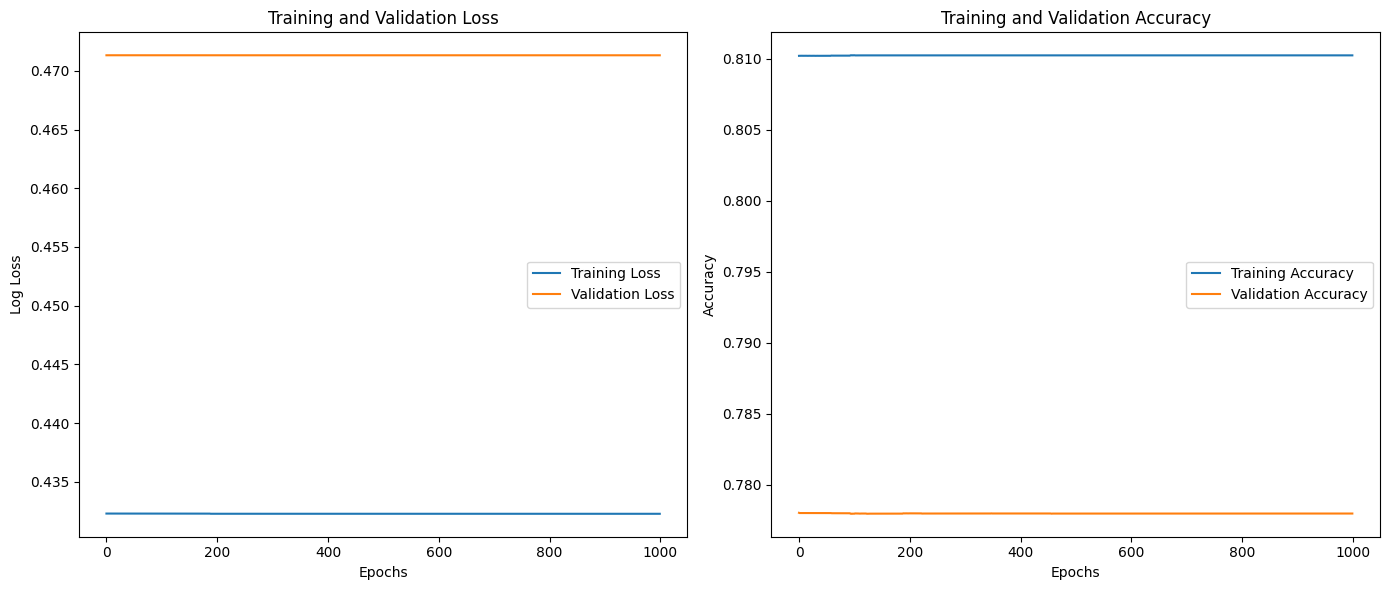

In [92]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.metrics import log_loss, accuracy_score

# Create a logistic regression model
model = LogisticRegression(max_iter=100000, warm_start=True, solver='lbfgs')

# Variables to store the loss and accuracy values
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

# Number of epochs
epochs = 1000

# Training loop
for epoch in range(epochs):
    model.fit(X_train, Y_train)
    y_train_pred_prob = model.predict_proba(X_train)
    y_val_pred_prob = model.predict_proba(X_test)
    y_train_pred = model.predict(X_train)
    y_val_pred = model.predict(X_test)

    # Calculate and store loss
    train_loss = log_loss(Y_train, y_train_pred_prob)
    val_loss = log_loss(Y_test, y_val_pred_prob)
    train_losses.append(train_loss)
    val_losses.append(val_loss)

    # Calculate and store accuracy
    train_accuracy = accuracy_score(Y_train, y_train_pred)
    val_accuracy = accuracy_score(Y_test, y_val_pred)
    train_accuracies.append(train_accuracy)
    val_accuracies.append(val_accuracy)

# Plot the loss curves
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(range(epochs), train_losses, label='Training Loss')
plt.plot(range(epochs), val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Log Loss')
plt.title('Training and Validation Loss')
plt.legend()

# Plot the accuracy curves
plt.subplot(1, 2, 2)
plt.plot(range(epochs), train_accuracies, label='Training Accuracy')
plt.plot(range(epochs), val_accuracies, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


In [93]:
model.fit(X_train,Y_train)

LogisticRegression(max_iter=100000, warm_start=True)

**Model Evaluation**

**Accuracy Score**

In [94]:
#accuracy score on tainning data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(Y_train,X_train_prediction)

In [95]:
print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  0.8102234375


In [96]:
#accuracy score on testing data
X_test_prediction = model.predict(X_test)
testing_data_accuracy = accuracy_score(Y_test,X_test_prediction)

In [97]:
print('Accuracy score of the testing data : ', testing_data_accuracy)

Accuracy score of the testing data :  0.777990625


**Saving the model**

In [98]:
import pickle
filename = 'trained_model.sav'
pickle.dump(model,open('trained_model.sav','wb'))

**using the modal for future prediction**

In [99]:
loaded_modal = pickle.load(open('trained_model.sav','rb'))

In [100]:
X_new = X_test[200]
print(Y_test[200])

prediction = loaded_modal.predict(X_new)
print(prediction)

if (prediction[0]==0):
  print('The tweet is Negative')
else:
  print('The tweet is Positive')

2
[2]
The tweet is Positive


In [101]:
X_new = X_test[3]
print(Y_test[3])

prediction = loaded_modal.predict(X_new)
print(prediction)

if (prediction[0]==0):
  print('The tweet is Negative')
else:
  print('The tweet is Positive')

0
[0]
The tweet is Negative
